# Library Declaration

In [55]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score

# Reading File

In [56]:
titanic=pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Handling null values

In [57]:
titanic.shape

(891, 12)

In [58]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Visualisation

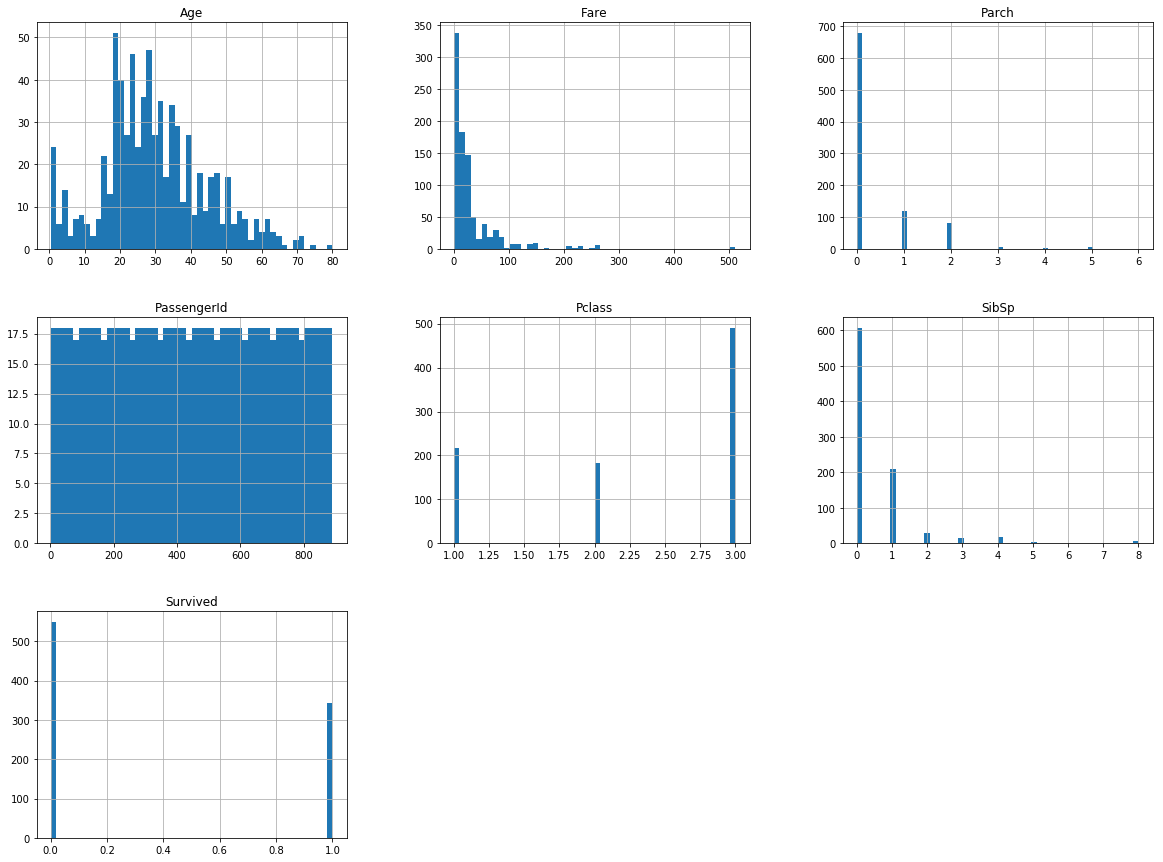

In [59]:
titanic.hist(bins=50,figsize=(20,15))
plt.show()

# Filling null values

In [60]:
titanic['Age']=titanic.Age.fillna(titanic['Age'].mean())
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Converting non-numerical data to numerical data

In [61]:
tit_dum=pd.get_dummies(titanic.Sex,drop_first=True,prefix='Sex')

In [62]:
tit=titanic.drop('Sex',axis=1).join(tit_dum)

In [63]:
tit.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


# Input Correleation

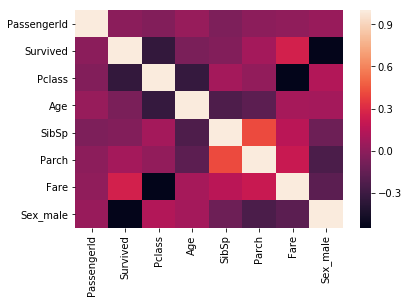

In [64]:
sb.heatmap(tit.corr())

# Test Train Split

In [65]:
x=tit[['Pclass','Sex_male','Age','Parch','SibSp','Fare']]
y=tit['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


# Implementing Decision Tree

In [66]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Model Evaluation

In [67]:
y_pred=dtree.predict(x_test)
y_pred_train=dtree.predict(x_train)

In [68]:
accuracy = metrics.accuracy_score(y_test, y_pred)
acc=metrics.accuracy_score(y_train,y_pred_train)
print('Accuracy of Test Data:',accuracy)
print('Accuracy of Train Data:',acc)

Accuracy of Test Data: 0.8208955223880597
Accuracy of Train Data: 0.8362760834670947


In [69]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[146  22]
 [ 26  74]]
             precision    recall  f1-score   support

          0       0.85      0.87      0.86       168
          1       0.77      0.74      0.76       100

avg / total       0.82      0.82      0.82       268



In [70]:
print(metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.classification_report(y_train,y_pred_train))

[[346  35]
 [ 67 175]]
             precision    recall  f1-score   support

          0       0.84      0.91      0.87       381
          1       0.83      0.72      0.77       242

avg / total       0.84      0.84      0.83       623



In [71]:
scores = cross_val_score(estimator= dtree,X=x,y=y,scoring = "accuracy",cv=10)                              
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.82222222 0.83333333 0.78651685 0.85393258 0.83146067 0.78651685
 0.79775281 0.78651685 0.85393258 0.82954545]
Average accuracy:  0.8181730223584156


# Developing a model by combining Sibsp and Parch as Family

In [72]:
family=list(tit['Parch']+tit['SibSp'])
Family=pd.DataFrame(family)
tit=tit.drop(['Parch','SibSp'],axis=1).join(Family)
tit.rename({0:'Family'},axis=1,inplace=True)
tit.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,Sex_male,Family
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,S,1,0


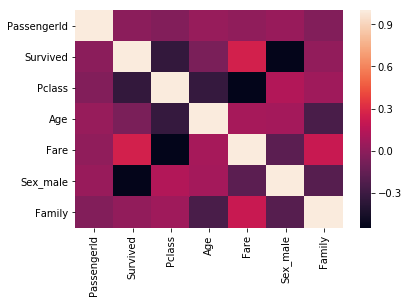

In [73]:
sb.heatmap(tit.corr())

In [74]:
x=tit[['Pclass','Sex_male','Age','Family','Fare']]
y=tit['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [75]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [76]:
y_pred=dtree.predict(x_test)
y_pred_train=dtree.predict(x_train)

In [77]:
accuracy = metrics.accuracy_score(y_test, y_pred)
acc=metrics.accuracy_score(y_train,y_pred_train)
print('Accuracy of Test Data:',accuracy)
print('Accuracy of Train Data:',acc)

Accuracy of Test Data: 0.8208955223880597
Accuracy of Train Data: 0.8362760834670947


In [78]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[147  21]
 [ 27  73]]
             precision    recall  f1-score   support

          0       0.84      0.88      0.86       168
          1       0.78      0.73      0.75       100

avg / total       0.82      0.82      0.82       268



In [79]:
print(metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.classification_report(y_train,y_pred_train))

[[345  36]
 [ 66 176]]
             precision    recall  f1-score   support

          0       0.84      0.91      0.87       381
          1       0.83      0.73      0.78       242

avg / total       0.84      0.84      0.83       623



In [80]:
scores = cross_val_score(estimator= dtree,X=x,y=y,scoring = "accuracy",cv=10)                              
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.81111111 0.83333333 0.78651685 0.85393258 0.83146067 0.78651685
 0.79775281 0.78651685 0.85393258 0.82954545]
Average accuracy:  0.8170619112473044
